In [1]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np

from numpy.polynomial.polynomial import Polynomial

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


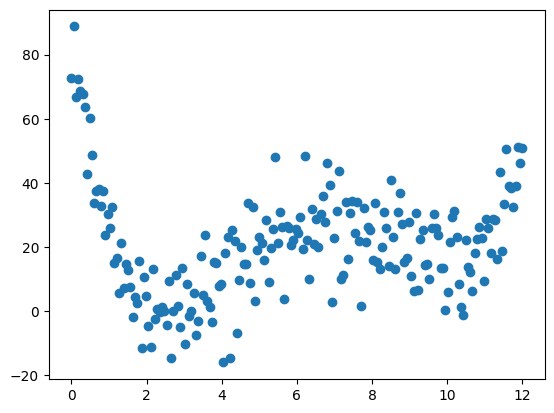

In [19]:
base_polynimial = Polynomial.fromroots((1,6,8,11))

x , y = base_polynimial.linspace(n=200, domain = (0,12))

y = ((y-60) * 0.1 + 31 ) + 10 * np.random.randn(y.size)

d = {"x":x, "y":y}

df = pd.DataFrame(data=d)

plt.scatter(x,y)


In [20]:
df.head()

,x,y
0,0.000000,72.855222
1,0.060302,88.763841
2,0.120603,66.907429
3,0.180905,72.441371
4,0.241206,68.698546


In [23]:
x = df[["x"]].values
y = df["y"].values

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.75, random_state=1)

In [30]:
maxdeg = 10

cross_validation = []
training_error = []

for d in range(maxdeg):

    x_poly = PolynomialFeatures(d).fit_transform(x)

    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)

    x_poly_val = PolynomialFeatures(d).fit_transform(x_val)

    lreg = LinearRegression()

    lreg.fit(x_poly_train, y_train)

    y_train_pred = lreg.predict(x_poly_train)

    training_error.append(mean_squared_error(y_train, y_train_pred))

    mse_score = cross_validate(
        estimator=lreg,
        X=x_poly,
        y=y,
        cv=10,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

    cross_validation.append(-(mse_score["test_score"].mean()))

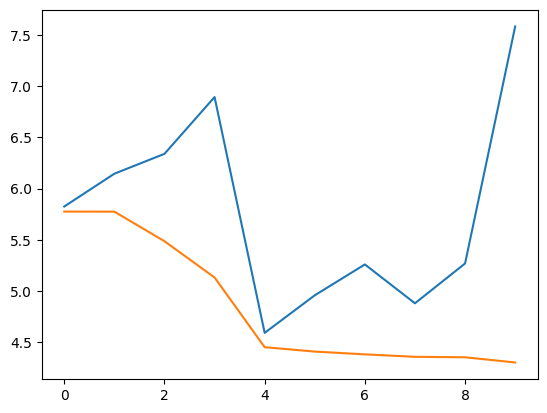

In [38]:
fig, ax = plt.subplots()

ax.plot(range(maxdeg), np.log(cross_validation))
ax.plot(range(maxdeg), np.log(training_error))

plt.show();